In [1]:
import numpy as np
import pandas as pd

from sklearn.manifold import trustworthiness
from sklearn.metrics import silhouette_score

from tqdm.autonotebook import tqdm

from tfumap.paths import ensure_dir, MODEL_DIR, DATA_DIR

output_dir = MODEL_DIR/'projections' 

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
#metrics_df = pd.read_pickle(DATA_DIR / 'projection_metrics.pickle')
metrics_df= pd.read_pickle(DATA_DIR / 'projection_metrics_test.pickle')

In [3]:
metrics_df[:3]

,dataset,class_,dim,trustworthiness,silhouette_score,silhouette_samples
0,mnist,umap-learn,2,0.957523,0.498622,"[0.6652105430819873, 0.5560565910285055, 0.674..."
1,mnist,network,2,0.940794,0.556763,"[0.6467435975005477, 0.7353703835055341, 0.751..."
2,mnist,autoencoder,2,0.930384,0.469030,"[0.6125063346018064, 0.5963238260826161, 0.657..."


In [4]:
datasets = [
    'cassins_dtw',
    'cifar10',
    'fmnist',
    'macosko2015',
    'mnist'
]

In [5]:
for dataset in datasets:
    for n_components in ['2', '64']:
        save_loc = DATA_DIR / 'projection_metrics' / 'train' / str(n_components) / (dataset + '.pickle')
        try:
            metric_df = pd.read_pickle(save_loc)
            metrics_df = pd.concat([metrics_df, metric_df])
        except FileNotFoundError:
            print(save_loc)

In [6]:
metrics_df.loc[metrics_df.dataset == 'cassins', 'dataset'] = 'cassins_dtw'

In [7]:
metrics_df[-3:]

,dataset,class_,dim,trustworthiness,silhouette_score,silhouette_samples
0,macosko2015,parametric-tsne,64,0.991776,-0.021432,"[-0.08902739890354991, 0.31910139972405144, 0...."
0,mnist,parametric-tsne,2,0.965484,0.371015,"[0.42210261689397277, 0.6585896581810273, 0.35..."
0,mnist,parametric-tsne,64,0.999686,0.048800,"[-0.010860901595925445, 0.18013561474196357, 0..."


In [8]:
metrics_df.class_.unique()

array(['umap-learn', 'network', 'autoencoder', 'PCA', 'TSNE',
       'parametric-tsne'], dtype=object)

In [9]:
import seaborn as sns

In [10]:
import matplotlib.pyplot as plt

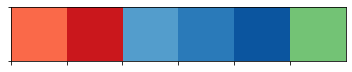

In [11]:
palette = sns.color_palette('Reds', 3)[1:] + sns.color_palette('Blues', 6)[3:] + sns.color_palette('Greens', 1) 
sns.palplot(palette)

In [12]:
from tfumap.paths import FIGURE_DIR, save_fig

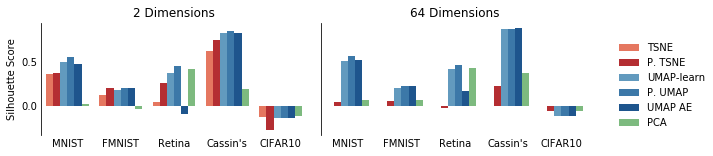

In [13]:
fg = sns.catplot(
    x="dataset",
    y="silhouette_score",
    hue="class_",
    hue_order=["TSNE", "parametric-tsne", "umap-learn",  "network", "autoencoder", "PCA"],
    order = ['mnist', 'fmnist', 'macosko2015', 'cassins_dtw', 'cifar10'],
    col="dim",
    height=2.5, 
    aspect=1.75,
    data=metrics_df,
    kind="bar",
    palette=palette,
    #legend=False
)
(fg.despine(bottom=True)
 .set_xticklabels(['MNIST', 'FMNIST', 'Retina', 'Cassin\'s', 'CIFAR10'])
 .set_axis_labels("", "Silhouette Score")
)
ax = fg.axes[0][0]
ax.tick_params(axis=u'both', which=u'both',length=0)
fg._legend._legend_title_box._text.set_text("")
#fg._legend.texts[2].set_text("P. UMAP")
#fg._legend.texts[3].set_text("UMAP AE")
ax.set_title('2 Dimensions')
ax = fg.axes[0][1]
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set_title('64 Dimensions')


fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'umap-learn'))[0][0]].set_text('UMAP-learn')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'network'))[0][0]].set_text('P. UMAP')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'autoencoder'))[0][0]].set_text('UMAP AE')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'parametric-tsne'))[0][0]].set_text('P. TSNE')

save_fig(FIGURE_DIR/'silhouette-test', save_pdf=True, dpi=300)

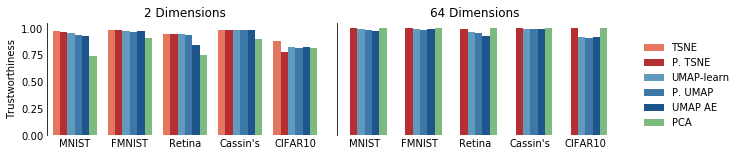

In [14]:
fg = sns.catplot(
    x="dataset",
    y="trustworthiness",
    hue="class_",
    hue_order=["TSNE", "parametric-tsne",  "umap-learn",  "network", "autoencoder", "PCA"],
    order = ['mnist', 'fmnist', 'macosko2015', 'cassins_dtw', 'cifar10'],
    col="dim",
    height=2.5, 
    aspect=1.75,
    data=metrics_df,
    kind="bar",
    palette=palette,
    #legend=False
)
(fg.despine(bottom=True)
 .set_xticklabels(['MNIST', 'FMNIST', 'Retina', 'Cassin\'s', 'CIFAR10'])
 .set_axis_labels("", "Trustworthiness")
)
ax = fg.axes[0][0]
ax.tick_params(axis=u'both', which=u'both',length=0)
fg._legend._legend_title_box._text.set_text("")


ax.set_title('2 Dimensions')
ax = fg.axes[0][1]
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set_title('64 Dimensions')

fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'umap-learn'))[0][0]].set_text('UMAP-learn')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'network'))[0][0]].set_text('P. UMAP')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'autoencoder'))[0][0]].set_text('UMAP AE')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'parametric-tsne'))[0][0]].set_text('P. TSNE')

save_fig(FIGURE_DIR/'trustworthiness-test', save_pdf=True, dpi=300)